In [1]:
# Improvement of model inspired from https://www.kaggle.com/code/samanyuk/house-price/notebook

import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

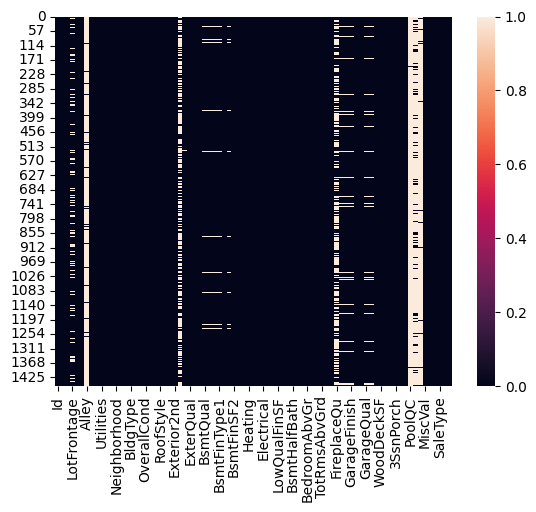

In [4]:
sns.heatmap(df.isnull())

In [5]:
df2 = df.copy()

for col in df2.columns:
    if df2[col].isna().sum() / df.shape[0]* 100 > 80:
        print(col)
        df2 = df2.drop(columns=col)
        
df2

Alley
PoolQC
Fence
MiscFeature


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [6]:
for col in df2.columns:
    if df2[col].isnull().sum()>0:
        print(col,'->',(df2[col].isnull().sum()/df2.shape[0])*100)

LotFrontage -> 17.73972602739726
MasVnrType -> 59.726027397260275
MasVnrArea -> 0.547945205479452
BsmtQual -> 2.5342465753424657
BsmtCond -> 2.5342465753424657
BsmtExposure -> 2.6027397260273974
BsmtFinType1 -> 2.5342465753424657
BsmtFinType2 -> 2.6027397260273974
Electrical -> 0.0684931506849315
FireplaceQu -> 47.26027397260274
GarageType -> 5.5479452054794525
GarageYrBlt -> 5.5479452054794525
GarageFinish -> 5.5479452054794525
GarageQual -> 5.5479452054794525
GarageCond -> 5.5479452054794525


Look at column MasVnrType & FireplaceQu

In [8]:
df2["MasVnrType"].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [9]:
df2["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

Apply OHE for columns MasVnrType and Fireplace

In [12]:
pd.get_dummies(df2[["MasVnrType", "FireplaceQu"]], dtype=int)

,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,1
1456,0,0,1,0,0,0,0,1
1457,0,0,0,0,0,1,0,0
1458,0,0,0,0,0,0,0,0


In [68]:
df3 = pd.concat([df2, pd.get_dummies(df2[["MasVnrType", "FireplaceQu"]], dtype=int)], axis=1)
df3.drop(columns=["MasVnrType", "FireplaceQu"], inplace=True)

In [84]:
colNulls = []

for col in df3.columns:
    if df3[col].isnull().sum()>0:
        print(col,'->',(df3[col].isnull().sum()/df3.shape[0])*100)
        colNulls.append(col)

BsmtQual -> 2.5342465753424657
BsmtCond -> 2.5342465753424657
BsmtExposure -> 2.6027397260273974
BsmtFinType1 -> 2.5342465753424657
BsmtFinType2 -> 2.6027397260273974
Electrical -> 0.0684931506849315
GarageType -> 5.5479452054794525
GarageFinish -> 5.5479452054794525
GarageQual -> 5.5479452054794525
GarageCond -> 5.5479452054794525


In [36]:
df3[colNulls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageYrBlt   1379 non-null   float64
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  GarageCond    1379 non-null   object 
dtypes: float64(3), object(10)
memory usage: 148.4+ KB


Check on the float columns first

<Axes: >

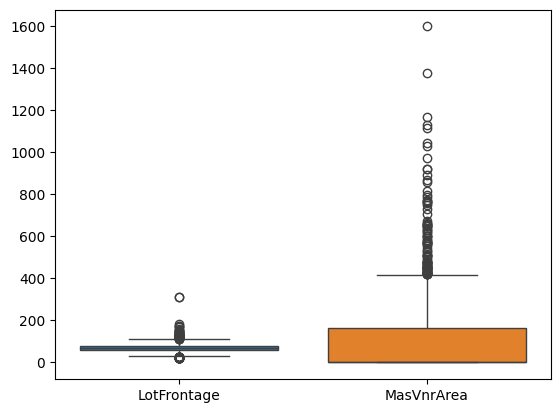

In [69]:
sns.boxplot(data=df3[["LotFrontage", "MasVnrArea"]])

<Axes: >

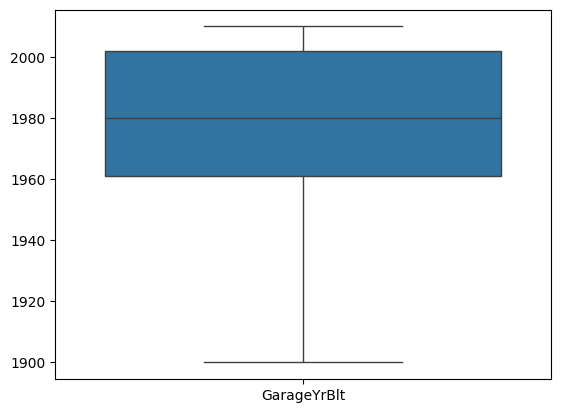

In [70]:
sns.boxplot(data=df3[["GarageYrBlt"]])

Median (extreme outliers available in columns)

1. Lot frontage
2. MasVnrArea

Mean

1. GarageYrBelt

In [79]:
df3["LotFrontage"] = df3["LotFrontage"].fillna(df3["LotFrontage"].median()) 
df3["MasVnrArea"] = df3["MasVnrArea"].fillna(df3["MasVnrArea"].median()) 

In [80]:
df3["GarageYrBlt"] = df3["GarageYrBlt"].fillna(df3["GarageYrBlt"].mean()) 

Now, for columns with object/string data type

BsmtQual      1423 non-null   object <br />
BsmtCond      1423 non-null   object <br />
BsmtExposure  1422 non-null   object <br />
BsmtFinType1  1423 non-null   object <br /> 
BsmtFinType2  1422 non-null   object <br /> 
Electrical    1459 non-null   object <br /> 
GarageType    1379 non-null   object <br /> 
GarageFinish  1379 non-null   object <br /> 
GarageQual    1379 non-null   object <br /> 
GarageCond    1379 non-null   object 

In [73]:
df3[colNulls[2]].dtype == object

True

In [81]:
for col in colNulls:
    
    if df3[col].dtype == object:
        df3[col] = df3[col].fillna(df3[col].mode())

In [83]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1460 non-null   int64  
 1   MSSubClass          1460 non-null   int64  
 2   MSZoning            1460 non-null   object 
 3   LotFrontage         1460 non-null   float64
 4   LotArea             1460 non-null   int64  
 5   Street              1460 non-null   object 
 6   LotShape            1460 non-null   object 
 7   LandContour         1460 non-null   object 
 8   Utilities           1460 non-null   object 
 9   LotConfig           1460 non-null   object 
 10  LandSlope           1460 non-null   object 
 11  Neighborhood        1460 non-null   object 
 12  Condition1          1460 non-null   object 
 13  Condition2          1460 non-null   object 
 14  BldgType            1460 non-null   object 
 15  HouseStyle          1460 non-null   object 
 16  Overal

Feature Extraction

In [110]:
columnsOHE = list(df.columns[df.dtypes == "object"])
columnsOHE

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [111]:
columnsOHE.append("MSSubClass")
columnsOHE

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [112]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [113]:
df.describe(include=[object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [166]:
col_with_null_val = []
lenDf = len(df)

# for c in df.columns:
for c in columnsOHE:
    if df[c].count() != lenDf:
        col_with_null_val.append(c)
    
col_with_null_val

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [167]:
df1 = df.copy()
for col in col_with_null_val:
    df1[col] = df1[col].fillna("NoVal")

In [168]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,MnPrv,NoVal,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,4,2010,WD,Normal,142125


In [169]:
df.describe(include=[object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [170]:
df1.describe(include=[object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,NoVal,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NoVal,NoVal,NoVal,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [171]:
df1[df1.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NoVal,IR2,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,GdWo,NoVal,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,MnPrv,NoVal,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1444,30,RL,NaN,8854,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,5,2009,WD,Normal,121000
1446,1447,20,RL,NaN,26142,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,4,2010,WD,Normal,157900
1449,1450,180,RM,21.0,1533,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,9,2009,WD,Normal,136000


In [172]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,MnPrv,NoVal,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,4,2010,WD,Normal,142125


In [204]:
df2 = pd.concat([df1, pd.get_dummies(df1[columnsOHE], dtype=int)], axis=1)
df2 = df2.drop(columns=columnsOHE)
df2 = df2.dropna()

In [205]:
df2["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1121, dtype: int64

In [206]:
X = df2.drop(columns=["SalePrice", "Id"])
Y = df2["SalePrice"]

In [207]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1121, dtype: int64

In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [209]:
rows_with_null = X_train[X_train.isnull().any(axis=1)]
rows_with_null

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial


In [210]:
reg = linear_model.LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [211]:
Y_pred = reg.predict(X_test)

In [213]:
mean_squared_error(Y_test, Y_pred)

2007322530.6061022